<a href="https://www.kaggle.com/code/mlbysoham/fine-tuned-ensemble-learning-on-churn?scriptVersionId=158209845" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Package Import

In [1]:
!pip install imblearn

In [2]:
import imblearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Wrangling

In [3]:
churn = pd.read_csv(r'/kaggle/input/playground-series-s4e1/train.csv')
churn

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


# Data Cleaning

In [4]:
churn.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
for i in churn.columns:
    print(i,':',sum(churn[i]==np.nan))

id : 0
CustomerId : 0
Surname : 0
CreditScore : 0
Geography : 0
Gender : 0
Age : 0
Tenure : 0
Balance : 0
NumOfProducts : 0
HasCrCard : 0
IsActiveMember : 0
EstimatedSalary : 0
Exited : 0


In [6]:
for i in churn.columns:
    print(i,':',sum(churn[i]=='NaN'))

id : 0
CustomerId : 0
Surname : 0
CreditScore : 0
Geography : 0
Gender : 0
Age : 0
Tenure : 0
Balance : 0
NumOfProducts : 0
HasCrCard : 0
IsActiveMember : 0
EstimatedSalary : 0
Exited : 0


In [7]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [8]:
churn.describe(include='all')

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034,165034.000000,165034,165034,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
unique,NaN,NaN,2797,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Hsia,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2456,NaN,94215,93150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,82516.5000,1.569201e+07,NaN,656.454373,NaN,NaN,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,NaN,80.103340,NaN,NaN,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,NaN,597.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,NaN,659.000000,NaN,NaN,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,NaN,710.000000,NaN,NaN,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000


In [9]:
churn = churn.drop(['Surname','CustomerId','id'],axis=1)
churn

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


# Data Analysis

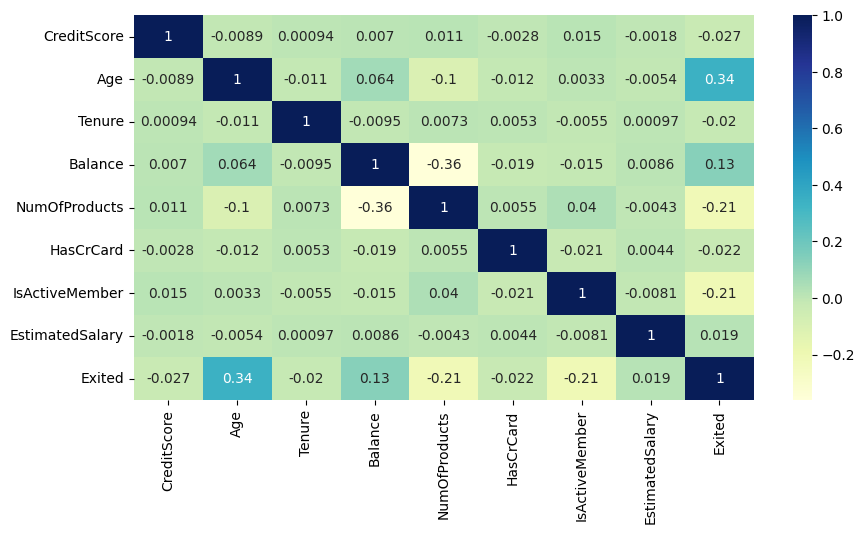

In [10]:
#heatmap
num_churn = churn.drop(['Geography','Gender'],axis=1)

plt.figure(figsize=(10,5))
cor=num_churn.corr()
sns.heatmap(cor,annot=True,cmap='YlGnBu')
plt.show()

/tmp/ipykernel_19/2341028129.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn.CreditScore[churn.Exited==1])
/tmp/ipykernel_19/2341028129.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn.CreditScore[churn.Exited==0])


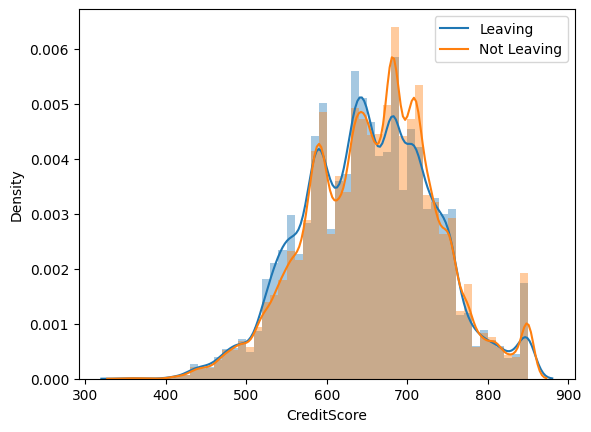

In [11]:
#analysis between CreditScore and Exited

sns.distplot(churn.CreditScore[churn.Exited==1])
sns.distplot(churn.CreditScore[churn.Exited==0])
plt.legend(['Leaving','Not Leaving'])
plt.show()

#CreditScore relation shows that people both leave and stay at each point

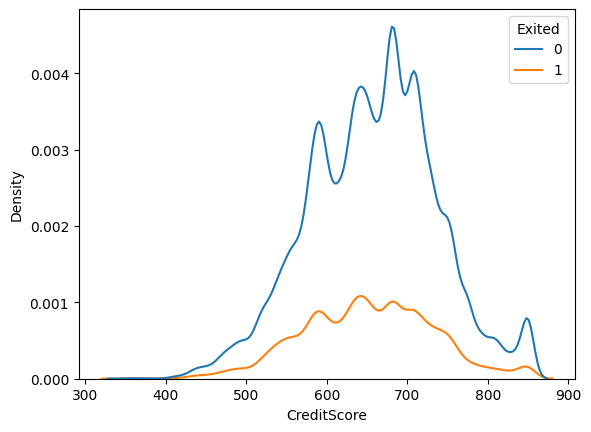

In [12]:
sns.kdeplot(x=churn.CreditScore,hue=churn.Exited)
plt.show()

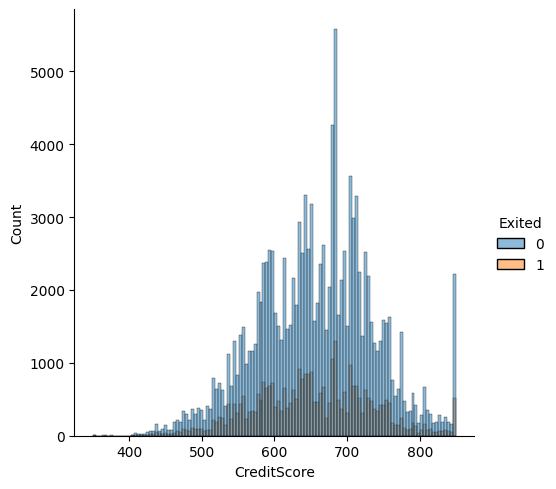

In [13]:
sns.displot(x=churn.CreditScore,hue=churn.Exited)
plt.show()

#data of persons leaving the bank is less, thus density of '1' is less

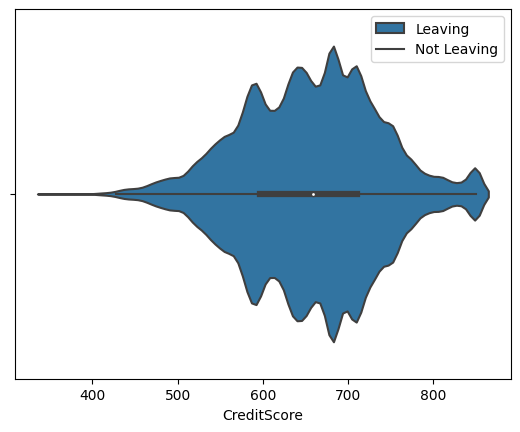

In [14]:
sns.violinplot(x=churn.CreditScore,hue=churn.Exited,data=churn)
plt.legend(['Leaving','Not Leaving'])
plt.show()

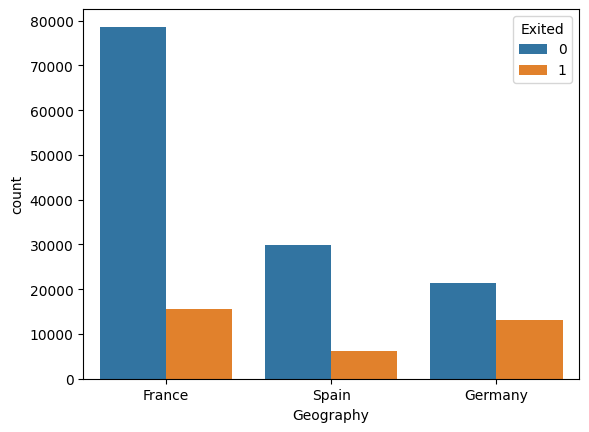

In [15]:
#analysis between geography and exited

sns.countplot(x=churn.Geography,hue=churn.Exited)
plt.show()

#the data from Geography affects the Exited, as more people from 'France' are leaving the bank

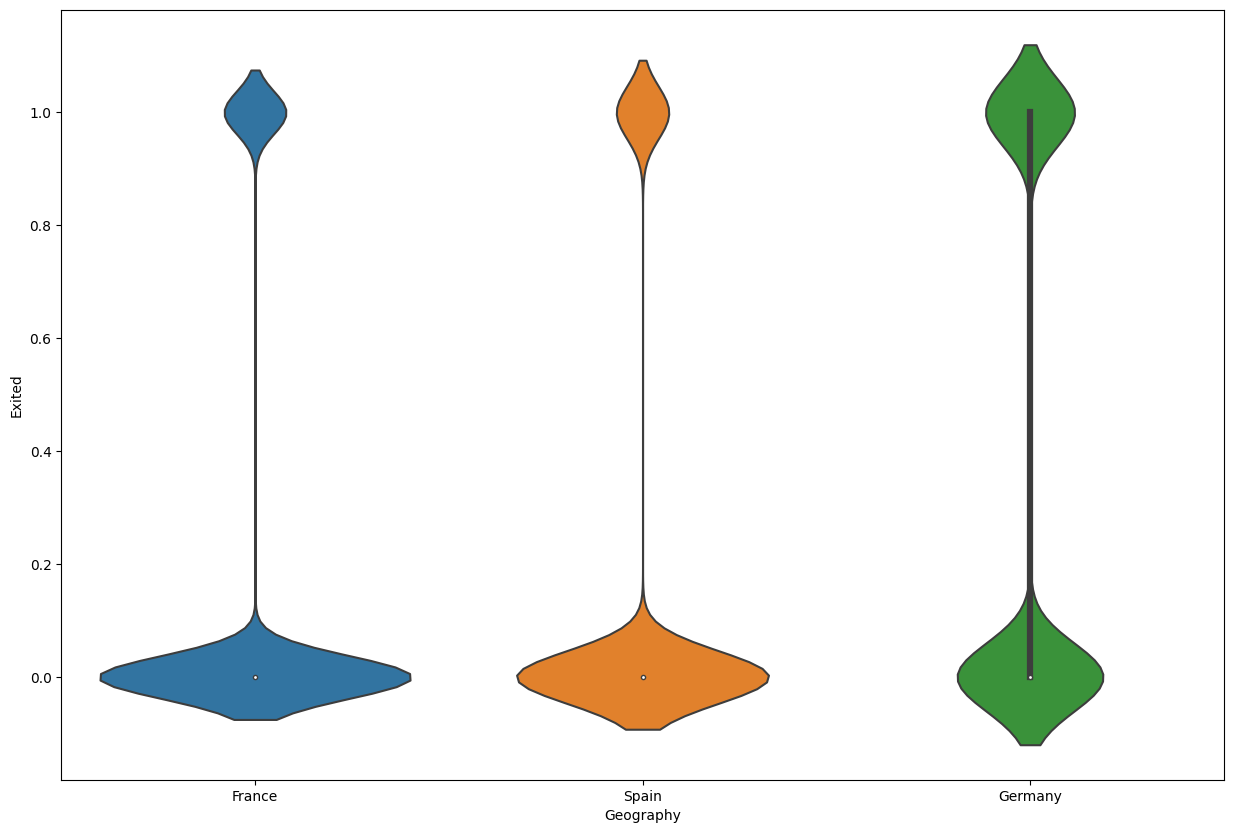

In [16]:
plt.figure(figsize=(15,10))
sns.violinplot(x=churn.Geography,y=churn.Exited)     #not possible for categorcial
plt.show()

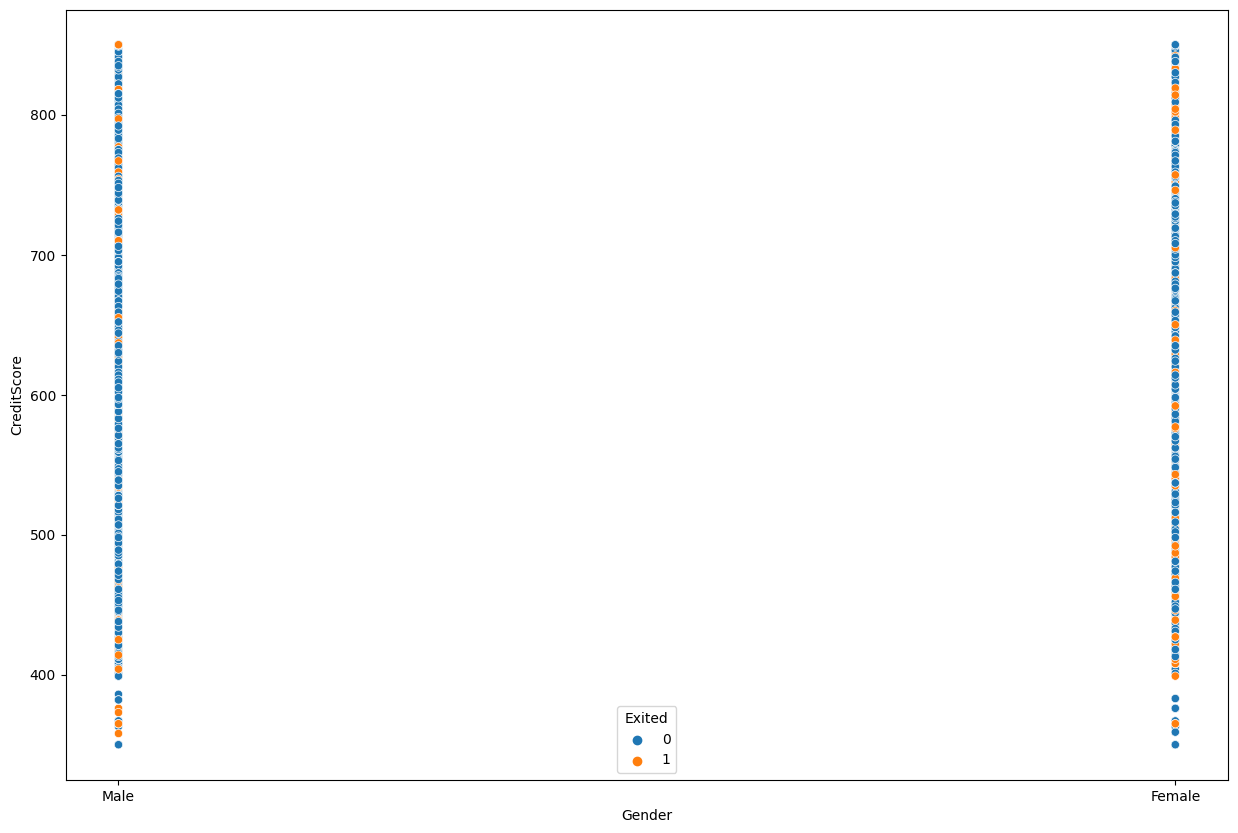

In [17]:
#analysis between gender and exited

plt.figure(figsize=(15,10))
sns.scatterplot(x=churn.Gender,y=churn.CreditScore,hue=churn.Exited)
plt.show()

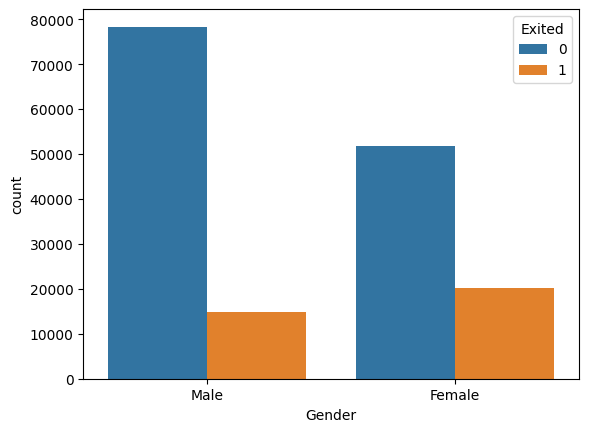

In [18]:
sns.countplot(x=churn.Gender,hue=churn.Exited)
plt.show()

#the data from Gender affects the Exited, as more 'male' people are leaving the bank

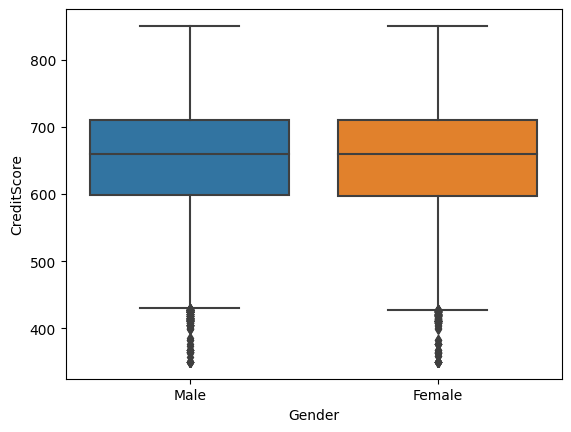

In [19]:
sns.boxplot(x=churn.Gender,y=churn.CreditScore)
plt.show()

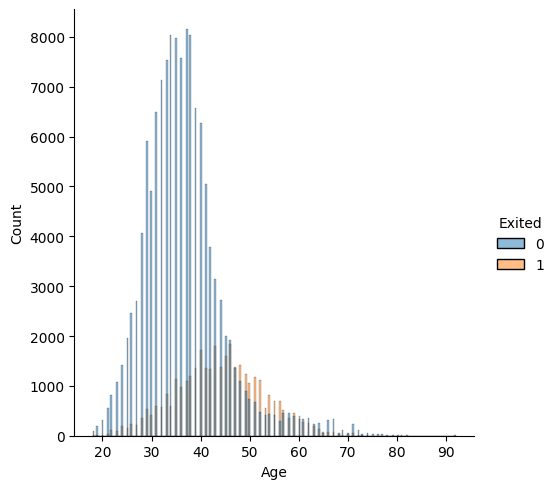

In [20]:
#analysis between age and exited

sns.displot(x=churn.Age,hue=churn.Exited)
plt.show()

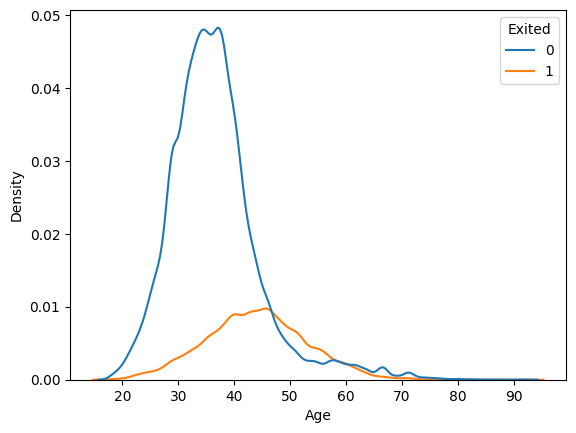

In [21]:
sns.kdeplot(x=churn.Age,hue=churn.Exited)
plt.show()

#less age people are leaving the bank

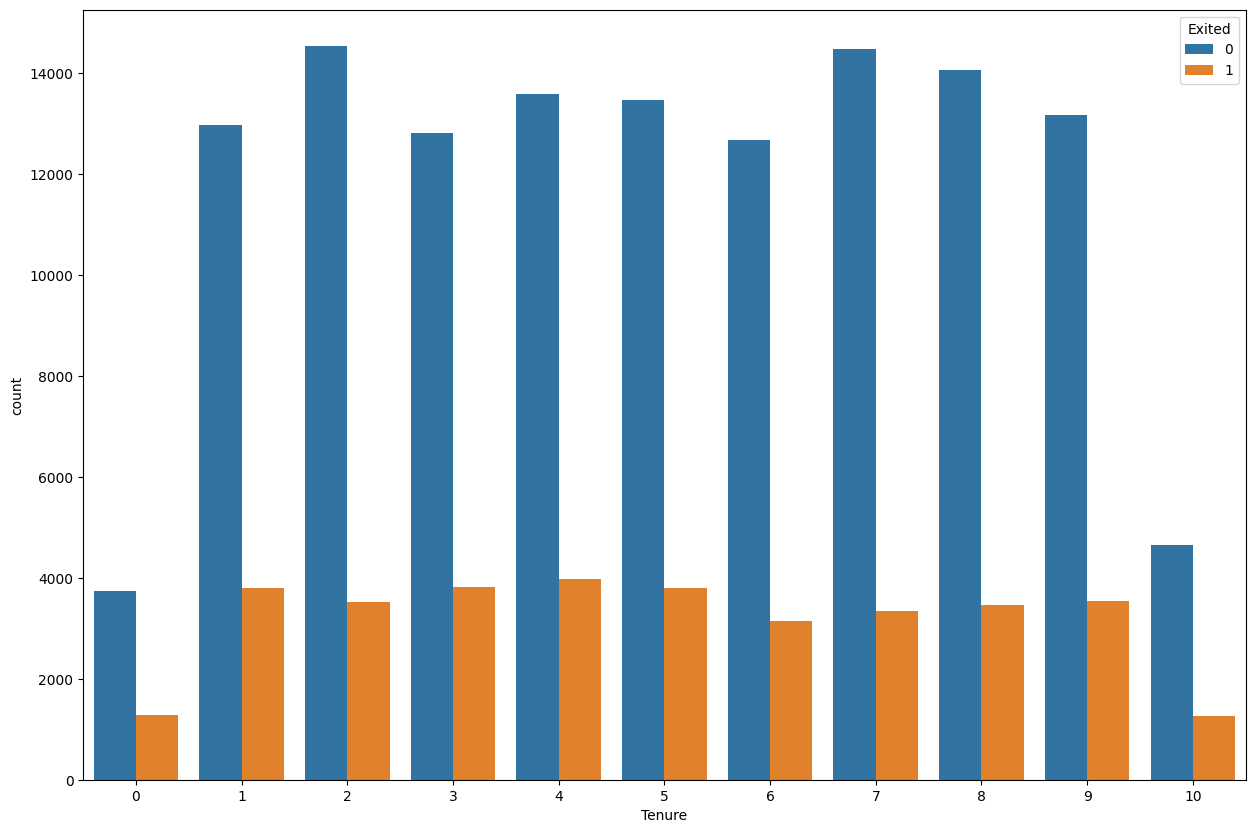

In [22]:
#analysis between tenure and exited

plt.figure(figsize=(15,10))
sns.countplot(x=churn.Tenure,hue=churn.Exited)
plt.show()

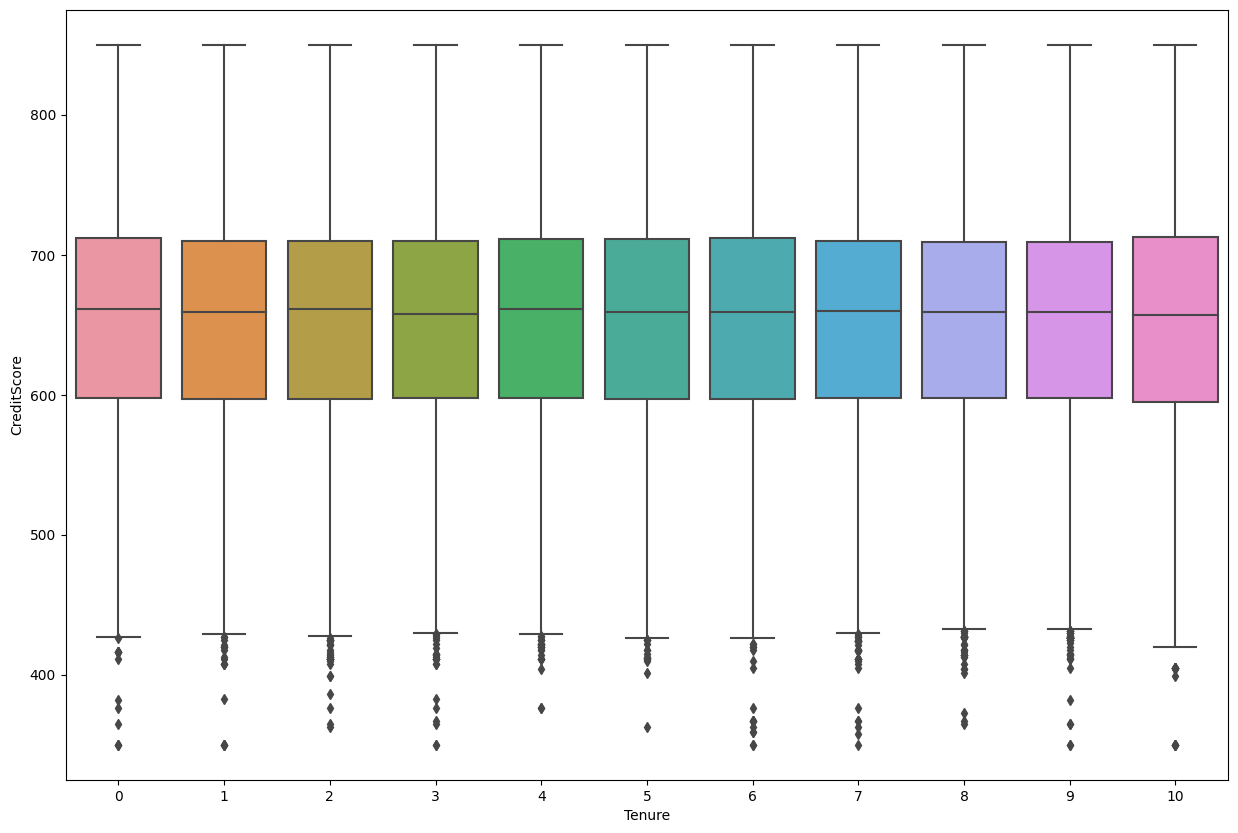

In [23]:
plt.figure(figsize=(15,10))
sns.boxplot(x=churn.Tenure,y=churn.CreditScore)
plt.show()

/tmp/ipykernel_19/3981106518.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn.Tenure[churn.Exited==1])
/tmp/ipykernel_19/3981106518.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn.Tenure[churn.Exited==0])


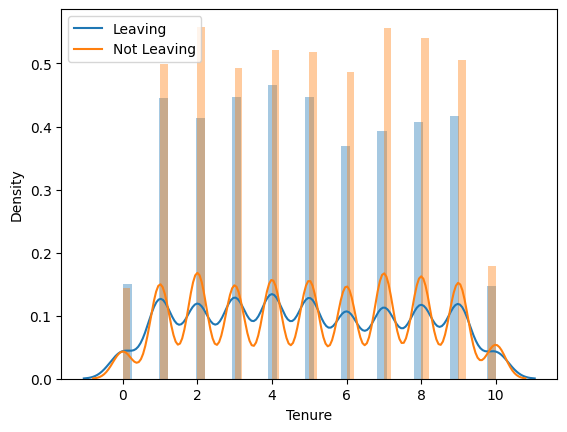

In [24]:
sns.distplot(churn.Tenure[churn.Exited==1])
sns.distplot(churn.Tenure[churn.Exited==0])
plt.legend(['Leaving','Not Leaving'])
plt.show()

#slight overlap can be seen, thus can be dropped in future to improve accuracy

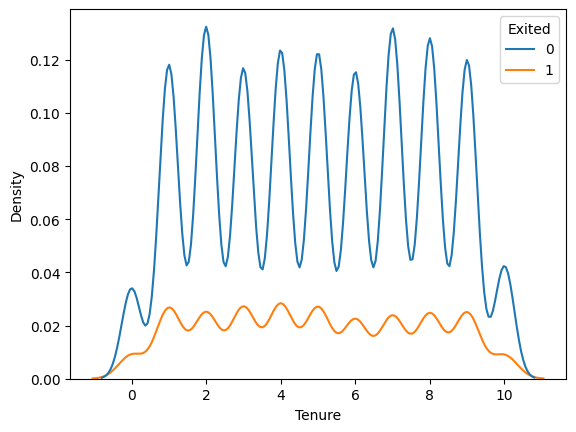

In [25]:
sns.kdeplot(x=churn.Tenure,hue=churn.Exited)
plt.show()

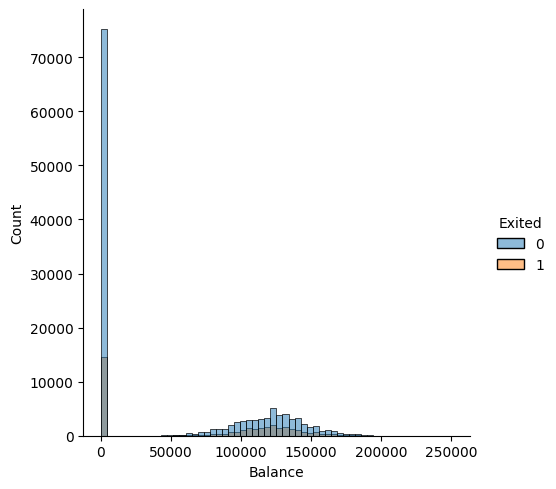

In [26]:
#analysis between balance and exited

sns.displot(x=churn.Balance,hue=churn.Exited)
plt.show()

/tmp/ipykernel_19/3530409707.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn.Balance[churn.Exited==1])
/tmp/ipykernel_19/3530409707.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn.Balance[churn.Exited==0])


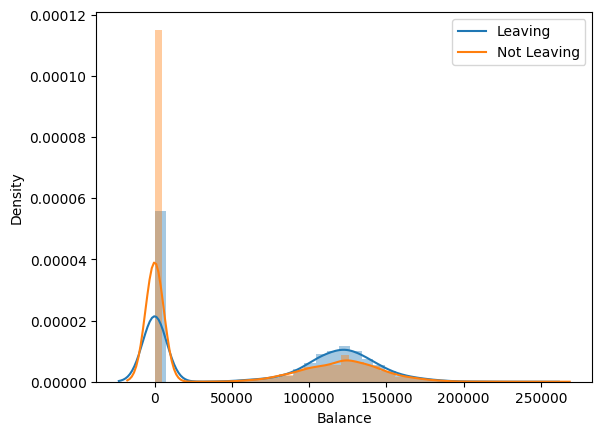

In [27]:
sns.distplot(churn.Balance[churn.Exited==1])
sns.distplot(churn.Balance[churn.Exited==0])
plt.legend(['Leaving','Not Leaving'])
plt.show()

#the data is non-overlapping, thus affecting

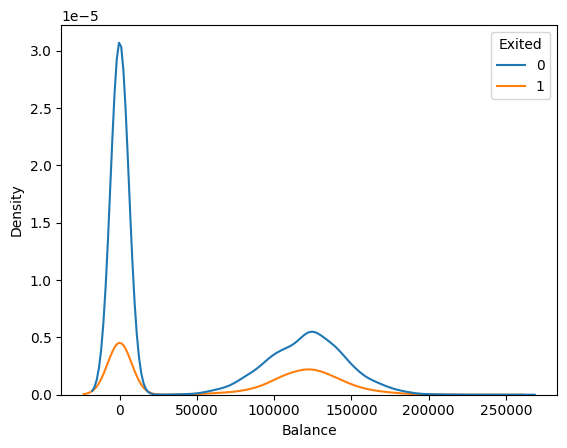

In [28]:
sns.kdeplot(x=churn.Balance,hue=churn.Exited)
plt.show()

/tmp/ipykernel_19/246948588.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn.NumOfProducts[churn.Exited==1])
/tmp/ipykernel_19/246948588.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn.NumOfProducts[churn.Exited==0])


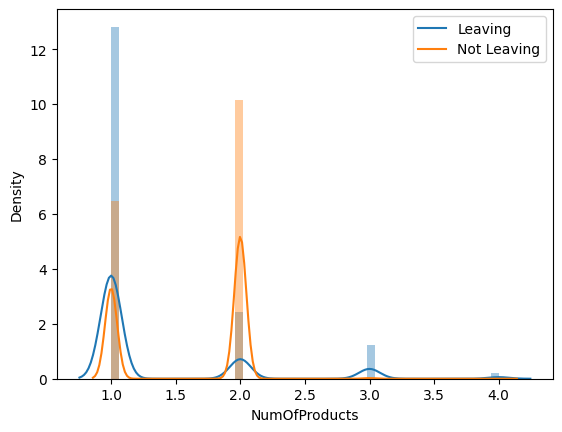

In [29]:
sns.distplot(churn.NumOfProducts[churn.Exited==1])
sns.distplot(churn.NumOfProducts[churn.Exited==0])
plt.legend(['Leaving','Not Leaving'])
plt.show()

#non-overlapping, thus shows that variation

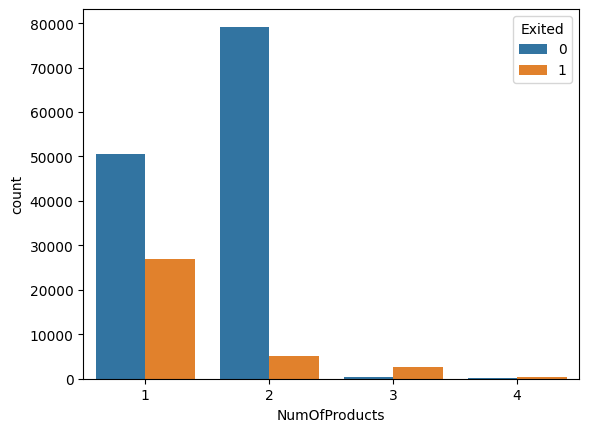

In [30]:
#analysis between NumOfProducts and Exited

sns.countplot(x=churn.NumOfProducts,hue=churn.Exited)
plt.show()

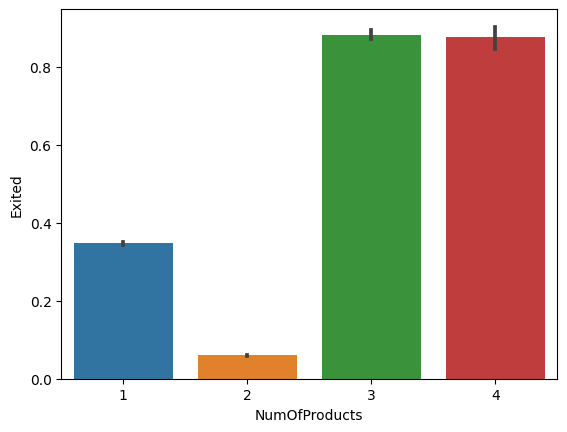

In [31]:
sns.barplot(x=churn.NumOfProducts,y=churn.Exited)
plt.show()


/tmp/ipykernel_19/3355940717.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn.HasCrCard[churn.Exited==1])
/tmp/ipykernel_19/3355940717.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn.HasCrCard[churn.Exited==0])


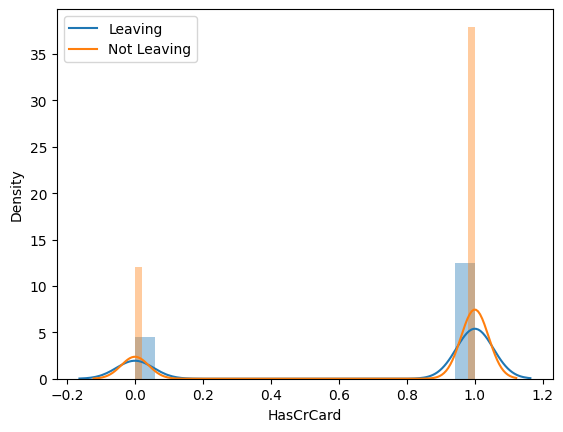

In [32]:
sns.distplot(churn.HasCrCard[churn.Exited==1])
sns.distplot(churn.HasCrCard[churn.Exited==0])
plt.legend(['Leaving','Not Leaving'])
plt.show()

#non-overlapping

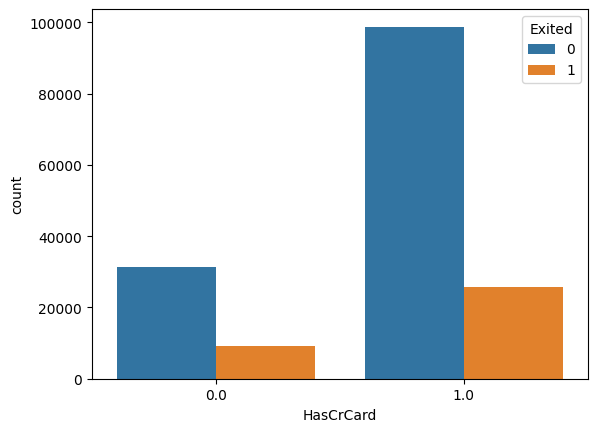

In [33]:
#analysis between hascrcard and exited

sns.countplot(x=churn.HasCrCard,hue=churn.Exited)
plt.show()

#non-overlapping, thus affecting the output

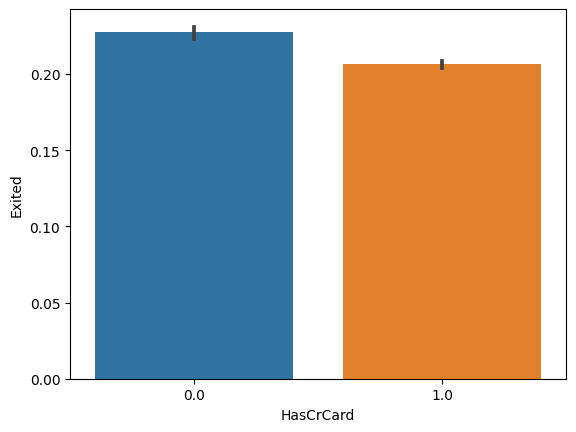

In [34]:
sns.barplot(x=churn.HasCrCard,y=churn.Exited)
plt.show()

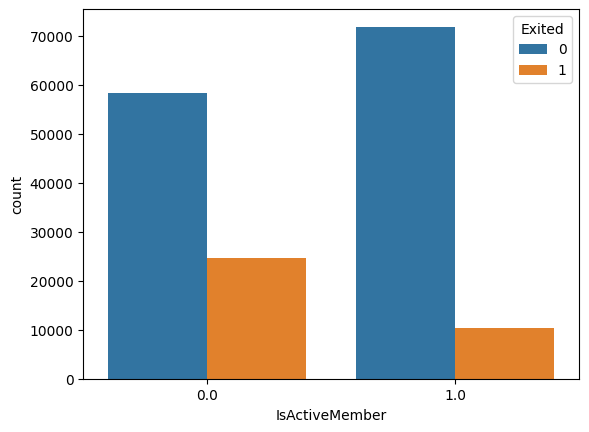

In [35]:
#analysis between isactivemember and exited

sns.countplot(x=churn.IsActiveMember,hue=churn.Exited)
plt.show()

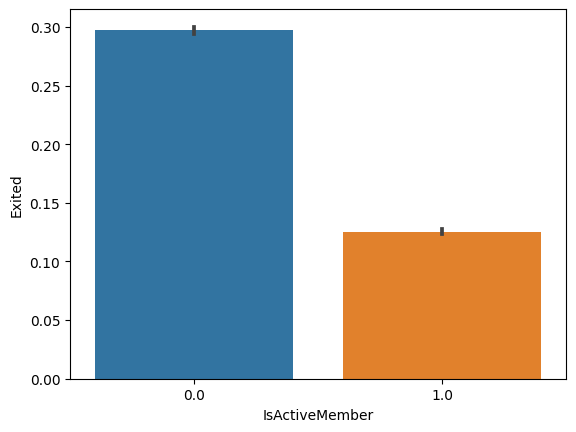

In [36]:
sns.barplot(x=churn.IsActiveMember,y=churn.Exited)
plt.show()

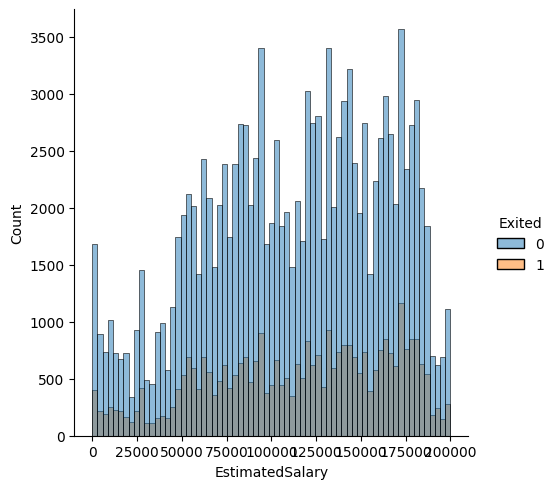

In [37]:
#analysis between estimatedsalary and exited

sns.displot(x=churn.EstimatedSalary,hue=churn.Exited)
plt.show()

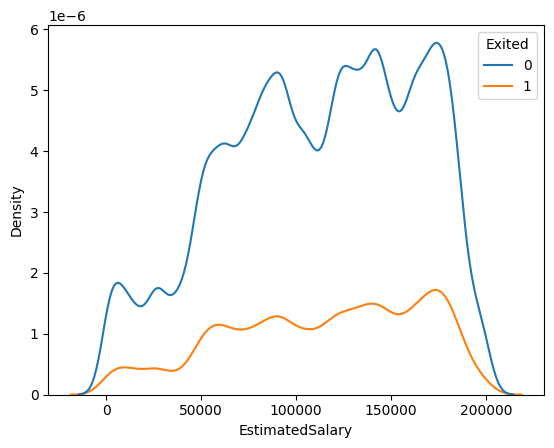

In [38]:
sns.kdeplot(x=churn.EstimatedSalary,hue=churn.Exited)
plt.show()


/tmp/ipykernel_19/1127099885.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn.EstimatedSalary[churn.Exited==1])
/tmp/ipykernel_19/1127099885.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(churn.EstimatedSalary[churn.Exited==0])


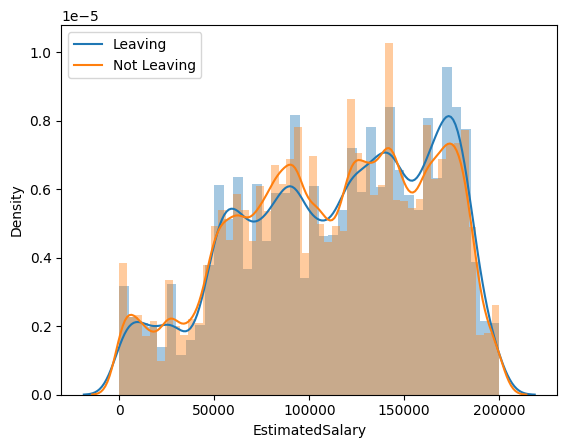

In [39]:
sns.distplot(churn.EstimatedSalary[churn.Exited==1])
sns.distplot(churn.EstimatedSalary[churn.Exited==0])
plt.legend(['Leaving','Not Leaving'])
plt.show()

#sligth overlap, thus can be dropped in future to improve accuracy

# Label Encoding

In [40]:
churn.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [41]:
churn.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [42]:
country_map = {'France': 0, 'Spain': 1, 'Germany': 2}

churn['Geography'] = churn['Geography'].map(country_map)

print(churn['Geography'].unique())

[0 1 2]


In [43]:
gender_map = {'Male': 0, 'Female': 1}

churn['Gender'] = churn['Gender'].map(gender_map)

print(churn['Gender'].unique())

[0 1]


In [44]:
churn.Gender.unique()

array([0, 1])

In [45]:
churn.Geography.unique()

array([0, 1, 2])

# Ip/Op creation

In [46]:
ip=churn.drop('Exited',axis=1)
op=churn.Exited

# Under Sampling
Under Sampling can be defined as removing some observations of the majority class. This is done until the majority and the minority class is balanced out.
Under sampling can be a good choice when you have a ton of data-think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.
In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.
A drawback to consider when under-sampling is that it can cause over-fitting and poor generalization to your test set.

## Random Under Sampling

In [47]:
from imblearn.under_sampling import RandomUnderSampler

#importing the 'RandomUnderSampler' library from 'imblearn' package

In [48]:
rus = RandomUnderSampler(random_state=105)

In [49]:
X_rus, y_rus = rus.fit_resample(ip,op)

In [50]:
X_rus.shape, y_rus.shape, ip.shape, op.shape

((69842, 10), (69842,), (165034, 10), (165034,))

In [51]:
op.value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

In [52]:
y_rus.value_counts()

#we can see that both the data for the 'exited' and not 'exited' are same.
#The 'not exited/0' has been reduced to the size of 'exited/1'

#the rows of the larger category are dropped to match that of the smaller one

Exited
0    34921
1    34921
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

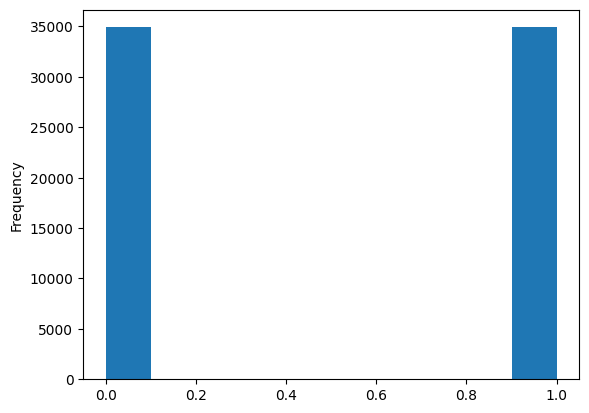

In [53]:
y_rus.plot(kind = 'hist')

### Split Random Under Sampled Data

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
xtr_rus, xts_rus, ytr_rus, yts_rus = train_test_split(X_rus,y_rus,test_size=0.25,random_state=25)

### Standardize Random Under Sampled Data


In [56]:
xtr_rus.size

523810

In [57]:
xts_rus.shape

(17461, 10)

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [59]:
xtr_rus = sc.fit_transform(xtr_rus)

In [60]:
xts_rus = sc.fit_transform(xts_rus)

### Model Pipeline

In [61]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from lightgbm import LGBMClassifier

In [62]:
# Creating pipelines for different classifiers
pipelines = {
    'KNN': Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]),
    'LightGBM': LGBMClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SGD': Pipeline([('scaler', StandardScaler()), ('sgd', SGDClassifier())]),
    'Gaussian NB': GaussianNB()
}

# Training and evaluating models
for name, pipe in pipelines.items():
    if name not in ['Random Forest', 'Gaussian NB', 'LightGBM']:  # These models don't require scaling
        pipe.fit(xtr_rus, ytr_rus)
    else:
        pipe.fit(xtr_rus, ytr_rus)

    # Predict
    y_pred = pipe.predict(xts_rus)

    # Calculate accuracy
    accuracy = accuracy_score(yts_rus, y_pred)
    print(f'{name} - Accuracy: {accuracy:.4f}')

    #print classification report
    print(f'{name} - Report:')
    print(classification_report(yts_rus, y_pred))


KNN - Accuracy: 0.7804
KNN - Report:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78      8842
           1       0.77      0.78      0.78      8619

    accuracy                           0.78     17461
   macro avg       0.78      0.78      0.78     17461
weighted avg       0.78      0.78      0.78     17461

LightGBM - Accuracy: 0.8051
LightGBM - Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81      8842
           1       0.80      0.81      0.80      8619

    accuracy                           0.81     17461
   macro avg       0.81      0.81      0.81     17461
weighted avg       0.81      0.81      0.81     17461

Random Forest - Accuracy: 0.7958
Random Forest - Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      8842
           1       0.79      0.80      0.79      8619

    accuracy                           0.

The under-sampling as expected didn't yeild good results as the quantity of data was reduced considerably.

# Over Sampling
Over Sampling can be defined as adding more copies to the minority class. Over-sampling can be a good choice, when you don't have a ton of data to work with.
The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause over-fitting.

## Random Over Sampling

In [63]:
from imblearn.over_sampling import RandomOverSampler

In [64]:
ros = RandomOverSampler(random_state=107)

In [65]:
X_ros , y_ros = ros.fit_resample(ip,op)

In [66]:
X_ros.shape, y_ros.shape, ip.shape, op.shape

((260226, 10), (260226,), (165034, 10), (165034,))

In [67]:
y_ros.value_counts()

Exited
0    130113
1    130113
Name: count, dtype: int64

In [68]:
op.value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

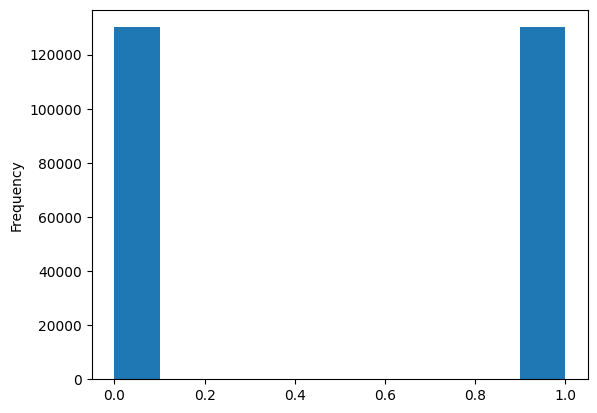

In [69]:
y_ros.plot(kind = 'hist')

#we can see that both the data for the 'exited' and 'not exited' are same.
#The 'exited/1' has been increased to the size of 'not exited/0'

#the rows of the smaller category is randomly assigned values, so as to match that of the larger one
#the benefit of 'random over sampling' is that we do not lose any of the original data from the dataset

### Split Random Over Sampled Data

In [70]:
xtr_ros, xts_ros, ytr_ros, yts_ros = train_test_split(X_ros,y_ros,test_size=0.25,random_state=25)

### Standardize Random Over Sampled Data


In [71]:
xtr_ros = sc.fit_transform(xtr_ros)

In [72]:
xts_ros = sc.fit_transform(xts_ros)

### Model Pipeline

In [73]:
# Creating pipelines for different classifiers
pipelines = {
    'KNN': Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]),
    'LightGBM': LGBMClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SGD': Pipeline([('scaler', StandardScaler()), ('sgd', SGDClassifier())]),
    'Gaussian NB': GaussianNB()
}

# Training and evaluating models
for name, pipe in pipelines.items():
    if name not in ['Random Forest', 'Gaussian NB', 'LightGBM']:  # These models don't require scaling
        pipe.fit(xtr_ros, ytr_ros)
    else:
        pipe.fit(xtr_ros, ytr_ros)

    # Predict
    y_pred = pipe.predict(xts_ros)

    # Calculate accuracy
    accuracy = accuracy_score(yts_ros, y_pred)
    print(f'{name} - Accuracy: {accuracy:.4f}')

    #print classification report
    print(f'{name} - Report:')
    print(classification_report(yts_ros, y_pred))


KNN - Accuracy: 0.8287
KNN - Report:
              precision    recall  f1-score   support

           0       0.87      0.77      0.82     32507
           1       0.79      0.89      0.84     32550

    accuracy                           0.83     65057
   macro avg       0.83      0.83      0.83     65057
weighted avg       0.83      0.83      0.83     65057

LightGBM - Accuracy: 0.8121
LightGBM - Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81     32507
           1       0.82      0.80      0.81     32550

    accuracy                           0.81     65057
   macro avg       0.81      0.81      0.81     65057
weighted avg       0.81      0.81      0.81     65057

Random Forest - Accuracy: 0.9385
Random Forest - Report:
              precision    recall  f1-score   support

           0       0.97      0.90      0.94     32507
           1       0.91      0.97      0.94     32550

    accuracy                           0.

Random Forest yeilds the most accuracy. Thus, further modifications are to be done on this particular model. But, it was found to under-perform in the test set, so the other two models KNN and LightGBM are also considered.

# Fine-Tuning Random Forest Classifier Model

In [74]:
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [75]:
# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameters grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [None, 5, 10],   # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required at each leaf node
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(xtr_ros, ytr_ros)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Predict using the best estimator
y_pred = best_rf.predict(xts_ros)

# Calculate accuracy
accuracy = accuracy_score(yts_ros, y_pred)
print(f'Best parameters: {best_params}')
print(f'Accuracy with best estimator: {accuracy:.4f}')

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy with best estimator: 0.9384


In [76]:
print(classification_report(yts_ros, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94     32507
           1       0.91      0.97      0.94     32550

    accuracy                           0.94     65057
   macro avg       0.94      0.94      0.94     65057
weighted avg       0.94      0.94      0.94     65057



# Fine-Tuning LightGBM Classifier Model

In [77]:
from lightgbm import LGBMClassifier

In [78]:
# Create a LightGBM classifier
lgbm_classifier = LGBMClassifier()

# Define the parameter grid for LightGBM
param_grid = {
    'num_leaves': [20, 30, 40],  # Maximum number of leaves in one tree
    'max_depth': [5, 10, 15],  # Maximum depth of the tree
    'learning_rate': [0.1, 0.01]  # Learning rate
}

# GridSearchCV to find the best model
grid_search = GridSearchCV(estimator=lgbm_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(xtr_ros, ytr_ros)

# Get the best model
best_lgbm = grid_search.best_estimator_

# Predict on the test set
y_pred = best_lgbm.predict(xts_ros)

# Calculate accuracy
accuracy = accuracy_score(yts_ros, y_pred)
print(f'Accuracy of the best LightGBM model: {accuracy:.4f}')

Accuracy of the best LightGBM model: 0.8133


In [79]:
print(classification_report(yts_ros, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82     32507
           1       0.82      0.80      0.81     32550

    accuracy                           0.81     65057
   macro avg       0.81      0.81      0.81     65057
weighted avg       0.81      0.81      0.81     65057



# Fine-Tuning CatBoost Classifier Model

In [80]:
from catboost import CatBoostClassifier, Pool

In [81]:
# Create a CatBoost classifier
catboost_classifier = CatBoostClassifier(verbose=False)

# Define the parameter grid for CatBoost
param_grid = {
    'iterations': [100, 200, 300],  # Number of boosting iterations
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'depth': [4, 6, 8]  # Depth of the trees
}

# GridSearchCV to find the best model
grid_search = GridSearchCV(estimator=catboost_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(xtr_ros, ytr_ros, cat_features=None)  # cat_features=None specifies no categorical features

# Get the best model
best_catc = grid_search.best_estimator_

# Predict on the test set
y_pred = best_catc.predict(xts_ros)

# Calculate accuracy
accuracy = accuracy_score(yts_ros, y_pred)
print(f'Accuracy of the best CatBoost model: {accuracy:.4f}')

Accuracy of the best CatBoost model: 0.8302


In [82]:
print(classification_report(yts_ros, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83     32507
           1       0.83      0.83      0.83     32550

    accuracy                           0.83     65057
   macro avg       0.83      0.83      0.83     65057
weighted avg       0.83      0.83      0.83     65057



# Fine-Tuning KNN Classifier Model

In [83]:
from sklearn.neighbors import KNeighborsClassifier

In [84]:
# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Define the parameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'p': [1, 2]  # Power parameter for Minkowski distance
}

# GridSearchCV to find the best model
grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(xtr_ros, ytr_ros)

# Get the best model
best_knn = grid_search.best_estimator_

# Predict on the test set
y_pred = best_knn.predict(xts_ros)

# Calculate accuracy
accuracy = accuracy_score(yts_ros, y_pred)
print(f'Accuracy of the best KNN model: {accuracy:.4f}')

Accuracy of the best KNN model: 0.8848


In [85]:
print(classification_report(yts_ros, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.79      0.87     32507
           1       0.82      0.98      0.90     32550

    accuracy                           0.88     65057
   macro avg       0.90      0.88      0.88     65057
weighted avg       0.90      0.88      0.88     65057



# Fine-Tuning Xgboost Classifier Model

In [86]:
from xgboost import XGBClassifier

In [87]:
# Create an XGBoost Classifier
xgb_classifier = XGBClassifier()

# Define the parameter grid for XGBoost Classifier
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used in updates
    'max_depth': [3, 4, 5]  # Maximum depth of the individual trees
}

# GridSearchCV to find the best model
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(xtr_ros, ytr_ros)

# Get the best model
best_xgboost = grid_search.best_estimator_

# Predict on the test set
y_pred = best_xgboost.predict(xts_ros)

# Calculate accuracy
accuracy = accuracy_score(yts_ros, y_pred)
print(f'Accuracy of the best XGBoost model: {accuracy:.4f}')

Accuracy of the best XGBoost model: 0.7809


In [88]:
print(classification_report(yts_ros, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.74      0.77     32507
           1       0.76      0.82      0.79     32550

    accuracy                           0.78     65057
   macro avg       0.78      0.78      0.78     65057
weighted avg       0.78      0.78      0.78     65057



# Ensemble Learning of Various Classifer Models

We select the fine-tuned versions of our best 3 models: KNN, Random Forest, for our final model, but not selecting the LightGBM.

In [89]:
from sklearn.ensemble import VotingClassifier

In [90]:
# Ensemble using VotingClassifier
final_model = VotingClassifier(estimators=[
    ('rf', best_rf),
    ('knn', best_knn),
    ('catboost', best_catc),
    ('xgb', best_xgboost)          
], voting='soft')  # 'soft' voting uses predicted probabilities for decision

# Train the ensemble model
final_model.fit(xtr_ros, ytr_ros)

# Predictions on the test set
y_pred = final_model.predict(xts_ros)

# Calculate accuracy
accuracy = accuracy_score(yts_ros, y_pred)
print(f'Accuracy of the ensemble model with CatBoost: {accuracy:.4f}')

Accuracy of the ensemble model with CatBoost: 0.9007


In [91]:
print(classification_report(yts_ros, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.84      0.89     32507
           1       0.86      0.96      0.91     32550

    accuracy                           0.90     65057
   macro avg       0.91      0.90      0.90     65057
weighted avg       0.91      0.90      0.90     65057



# Final Model Predictions

In [92]:
test_data=pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')
test_data

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [93]:
result=pd.DataFrame(test_data['id'])
result

,id
0,165034
1,165035
2,165036
3,165037
4,165038
...,...
110018,275052
110019,275053
110020,275054
110021,275055


In [94]:
test_data = test_data.drop(['Surname','CustomerId','id'],axis=1)
test_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...
110018,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [95]:
test_data.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [96]:
test_data.Geography.unique()

array(['France', 'Germany', 'Spain'], dtype=object)

In [97]:
country_map = {'France': 0, 'Spain': 1, 'Germany': 2}

test_data['Geography'] = test_data['Geography'].map(country_map)

print(test_data['Geography'].unique())

[0 2 1]


In [98]:
gender_map = {'Male': 0, 'Female': 1}

test_data['Gender'] = test_data['Gender'].map(gender_map)

print(test_data['Gender'].unique())

[1 0]


In [99]:
test_data.Gender.unique()

array([1, 0])

In [100]:
test_data.Geography.unique()

array([0, 2, 1])

In [101]:
test_data = sc.fit_transform(test_data)

In [102]:
y_pred = final_model.predict_proba(test_data)[:, 1]

In [103]:
result['Exited'] = y_pred

# Submission

In [104]:
result.to_csv('submission.csv',index=False)
print("Result has been saved in submission.csv")

Result has been saved in submission.csv
